## Practical 10: Preprocessing in Image Analysis

_Adele Valeria_ <br>
_BSc Biomedical Informatics_ <br>
_Zhejiang University - University of Edinburgh Institute_

### Import Libraries

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import rescale
from skimage import exposure
from skimage.exposure import equalize_hist
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.filters import median
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet

### 1. Loading Images

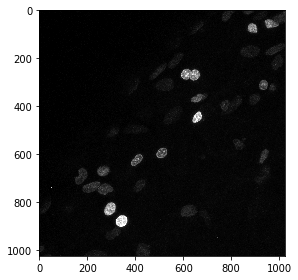

In [66]:
nuclei = imread("nuclei.tif")
imshow(nuclei)

In [67]:
print(nuclei.shape)
print(nuclei.dtype)

(1024, 1024)
uint8


- **What is the image resolution?**
1024 x 1024 pixels

- **What is its bit depth?**
8-bit images (0-255)

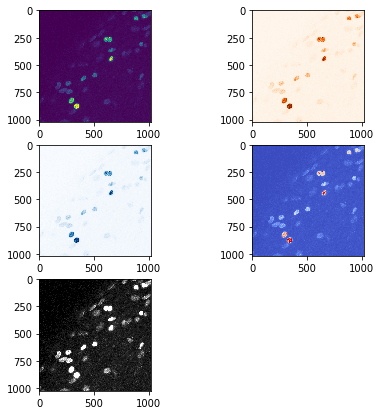

In [68]:
fix, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (7, 7))
ax[0, 0].imshow(nuclei, cmap = "viridis")
ax[1, 0].imshow(nuclei, cmap = "Blues")
ax[2, 0].imshow(nuclei, cmap = "gray", vmin = 0, vmax = 50)
ax[0, 1].imshow(nuclei, cmap = "Oranges")
ax[1, 1].imshow(nuclei, cmap = "coolwarm")
fix.delaxes(ax[2,1])
plt.show()

### 2. Basic Manipulations

Produce a new image where you crop a vertical strip of 100 pixels on the left

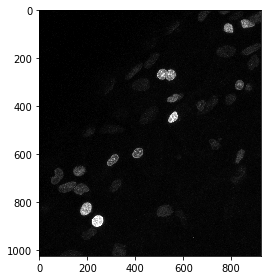

In [69]:
nuclei_sml = nuclei[:, 100:]
imshow(nuclei_sml)

Load an image and take off the last 10 columns

In [80]:
nuclei_last = nuclei[:, -10]

Flip your image horizontally and vertically

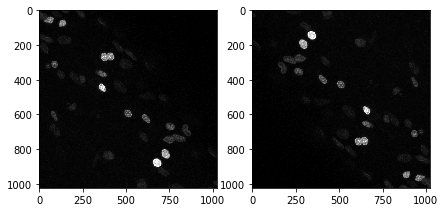

In [93]:
# horizontal
nuclei_flip_hor = nuclei[:, ::-1]

# vertical
nuclei_flip_ver = nuclei[::-1, :]

fix, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (7, 7))
ax[0].imshow(nuclei_flip_hor, cmap = "gray")
ax[1].imshow(nuclei_flip_ver, cmap = "gray")

Load an image and scale it down 2 times. Is the reosolution reduced?

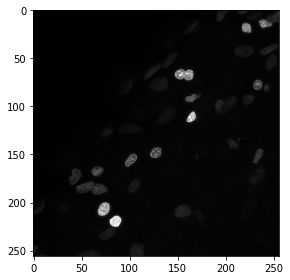

In [97]:
imshow(rescale(nuclei, 0.25, order = 0), cmap = "gray")

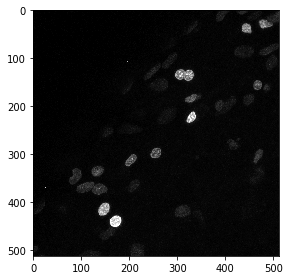

In [101]:
rescale_by_indexing = nuclei[::2, ::2]
imshow(rescale_by_indexing)

### 3. Image Histograms

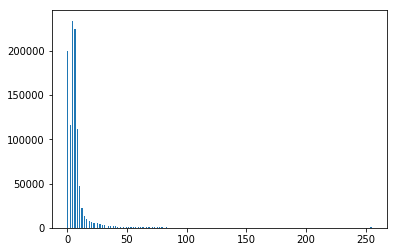

In [143]:
hist = plt.hist(nuclei.ravel(), bins = range(256))
plt.show()

How many pixels of the image have intensity less or equal to 100?
Hist return a tuple of 3 elements. The first contains the counts and the second the bin edges.

In [148]:
count = 0
for i in range (0, 100):
    count = count + hist[0][i]
print(count)

1037629.0


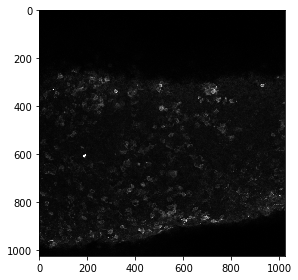

In [152]:
cell = imread("cells.tif")
imshow(cell)

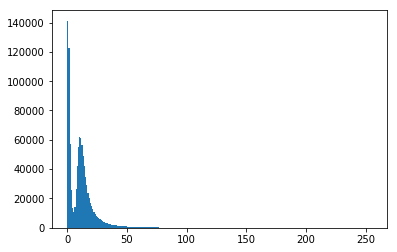

In [153]:
hist_cell = plt.hist(cell.ravel(), bins = range(256))
plt.show()

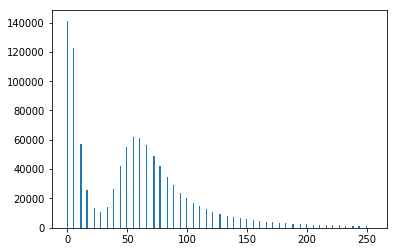

In [156]:
# stretch histogram
p2, p98 = np.percentile(cell, (2, 98))
cell_exp = exposure.rescale_intensity(cell, in_range = (p2, p98))
plt.hist(cell_exp.ravel(), bins = range(255))
plt.show()

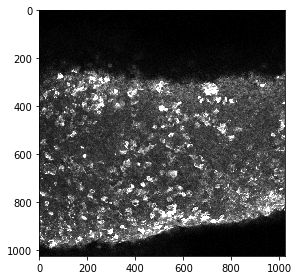

In [157]:
imshow(cell_exp)

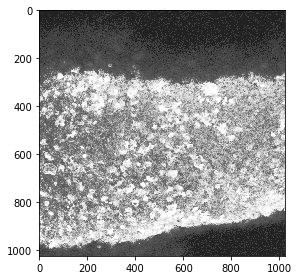

In [162]:
# equalize histogram
cell_eq = equalize_hist(cell)
imshow(cell_eq, cmap = "gray")

### 4. Filters

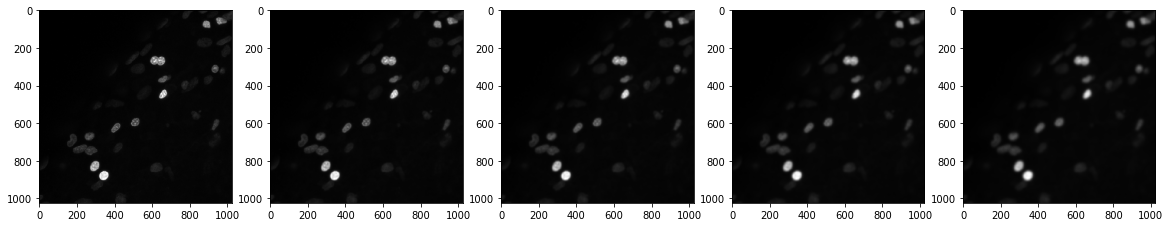

In [177]:
# Blurring
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize = (20, 20))
for i in range(0,5):
    nuclei_blur = gaussian(nuclei, i+2)
    ax[i].imshow(nuclei_blur, cmap = "gray")

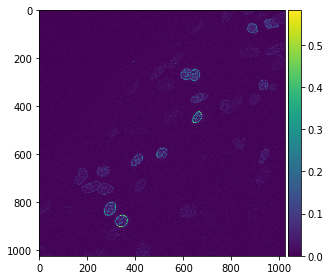

In [180]:
# detect edges
nuclei_edges = sobel(nuclei)
imshow(nuclei_edges)

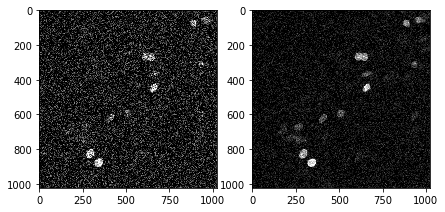

In [194]:
# denoise an image
nuclei_noisy = imread("nuclei_noisy.tif")
nuclei_med = median(nuclei_noisy, np.ones((3,3)))
fig, ax = plt.subplots(1, 2, figsize = (7, 7))
ax[0].imshow(nuclei_noisy, cmap = "gray")
ax[1].imshow(nuclei_med, cmap = "gray")

/home/adele/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  This is separate from the ipykernel package so we can avoid doing imports until


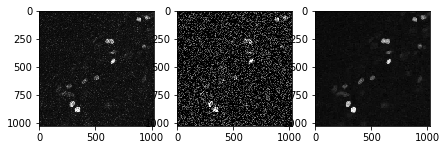

In [198]:
chambolle = denoise_tv_chambolle(nuclei_noisy)
bilateral = denoise_bilateral(nuclei_noisy)
wavelet = denoise_wavelet(nuclei_noisy)

fix, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (7, 7))
ax[0].imshow(chambolle, cmap = "gray")
ax[1].imshow(bilateral, cmap = "gray")
ax[2].imshow(wavelet, cmap = "gray")

### Final Challenge

In [211]:
# source: codespeedy.com/calculate-signal-to-noise-ratio-in-python/
def signaltonoise(Arr, axis=0, ddof=0):
    Arr = np.asanyarray(Arr)
    me = Arr.mean(axis)
    sd = Arr.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)

signaltonoise(nuclei_noisy)

array([0.76547306, 0.73749101, 0.72295009, ..., 0.74704386, 0.78098222,
       0.75755941])